# Numerical Stability Investigation
--------------------------------------
# Motion in a central potential

<div style="background-color: white;">
    <img src="figures/forces3.jpg" alt="Image description" />
</div>

#### An object of mass $m$ under the effects of a central force $F$.

# Kepler’s problem

The motion of the sun and the earth is an example of a two-body problem. This is a relatively simple problem that can be solved analytically (it's interesting to notice here, however, that adding a new object to the problem, the moon for instance, make it completely intractable. This is the famous “three body problem”). We can assume that, to a good approximation, the sun is stationary and is a convenient origin of our coordinate system. This is equivalent to changing to a center of mass coordinate system, where most of the mass is concentrated in the sun. The problem can be reduced to an equivalent one body problem involving an object of reduced mass $\mu$ given by

$$\mu=\frac{mM}{m+M}$$ 

Since the mass of the earth is $m=5.99\times 10^{24}$ kg and the mass of the sun is $M=1.99\times 10^{30}$ kg we find that for most practical purposes, the reduced mass of the earth-sun system is that of the earth. Hence, in the following we are going to consider the problem of a single particle of
mass $m$ moving about a fixed center of force, which we take as the origin of the coordinate system. The gravitational force on the particle $m$ is given by

$${\mathbf F}=-\frac{GMm}{r^3}{\mathbf r},$$ 

where the vector ${\mathbf r}$ is directed from $M$ to $m$, and $G$ is the gravitation constant 

$$G=6.67\times 10^{-11} \frac{m^3}{kg.s^2}$$

The negative sign implies that the gravitational force is attractive, and decreases with the separation $r$. The gravitational force is a “central force”: its magnitude depends on the separation between the particles and its direction is along the line that connects them. Because gravitation is a central force, angular momentum is conserved. Since angular momentum is a vector quantity, we can restrict motion of a orbiting body to 2 dimensions, that is the $xy$ plane. The angular momentum ${\mathbf L}$ lies on the third direction $z$ and is a constant of motion, <span>*i.e.*</span> it is conserved:

$$L_z=({\mathbf r}\times m{\mathbf v})_z=m(xv_y-yv_x)=\mathrm{const.}$$

An additional constant of motion is the total energy $E$ given by

$$E=\frac{1}{2}mv^2-\frac{GmM}{r}$$

If we fix the coordinate system in the sun, the equation of motion is

$$m\frac{d^2{\mathbf r}}{dt^2}=-\frac{mMG}{r^3}{\mathbf r}$$ 

For computational purposes it is convenient to write it down in cartesian components:
$$\begin{aligned}
&& F_x=-\frac{GMm}{r^2}\cos{\theta}=-\frac{GMm}{r^3}x, \\
&& F_y=-\frac{GMm}{r^2}\sin{\theta}=-\frac{GMm}{r^3}y.\end{aligned}$$
Hence, the equations of motions in cartesian coordinates are:
$$\begin{aligned}
&& \frac{d^2x}{dt^2}=-\frac{GM}{r^3}x, \\
&& \frac{d^2y}{dt^2}=-\frac{GM}{r^3}y, \end{aligned}$$ 

where $r^2=x^2+y^2$. These are coupled differential equations, since each differential equation contains both $x$ and $y$.

### Circular motion 

Since many planetary orbits are nearly circular, it is useful to obtain the condition for a circular orbit. In this case, the magnitude of the acceleration ${\mathbf a}$ is related to the radius by

$$a=\frac{v^2}{r}$$ 

where $v$ is the speed of the object. The acceleration is always directed toward the center. Hence

$$\frac{mv^2}{r}=\frac{GMm}{r^2}$$ 

or 

$$v=\left(\frac{GM}{r}\right)^{1/2}.$$ 

This is a general condition for the circular orbit. We can also find the dependence of the period $T$ on the radius of a circular orbit. Using the relation 

$$T=\frac{2\pi r}{v},$$ 

we obtain

$$T^2=\frac{4\pi^2r^3}{GM}$$

### Elliptical orbits 

An ellipse has two foci $F_1$ and $F_2$, and has the property that for any point the distance $F_{1P}+F_{2P}$ is a constant. It also has a horizontal semi-axis $a$ and a vertical $b$. It is common in astronomy to characterize an orbit by its “eccentricity” $e$, given by the ratio of the distance between the foci, and the length of the major axis $2a$. Since $F_{1P}+F_{2P}=2a$, it is easy to show that (consider a point $P$ at $x=0$,$y=b$)

$$e=\sqrt{1- \frac{b^2}{a^2}},$$ 

with $0<e<1$. A special case is $a=b$ for which the ellipse reduces to a circle and $e=0$. The earth orbit has eccentricity $e=0.0167$.

<div style="text-align: center;">
    <img src="figures/ellipse_eccentricity.png" alt="Image description" style="width: 60%;" />
</div>

### Astronomical units 
It is useful to choose a system of units where the product $GM$ is of the order of unity. To describe the earth’s motion, the convention is to
choose the earth’s semi-major axis as the unit of length, called “astronomical unit” (AU) and is $$1\,AU=1.496 \times 10^{11}\,m.$$ The unit of time is taken to be “one year”, or $3.15 \times 10^7$ s. In these units, $T=1$ yr, $a=1$ AU, and we can write $$GM=\frac{4\pi ^2a^3}{T^2}=4\pi ^2 \,AU^3/yr^2.$$

## Simulation of an Orbit 

Let's use the class `Particle2D` to simulate a circular orbit. In our simulations, we'll take the initial conditions (in astronomical units) $x_0=1$, $y_0=0$ and $v_x(t=0)=0$. We must choose a value of $\Delta t$ such that to a good approximation the total energy $E$ is conserved. Then we have to ask ourselves, "is your value of $\Delta t$ small enough to reproduce the orbit over several periods?"



In [1]:
import numpy as np

class Particle2D:
    def __init__(self, mass=1., x=0., y=0., vx=0., vy=0.):
        """
        Initializes the particle with mass, position, and velocity.
        """
        self.mass = mass
        self.position = np.array([x, y], dtype=float)
        self.velocity = np.array([vx, vy], dtype=float)
    
    def euler(self, force, dt):
        """Euler method for updating state."""
        self.velocity += (force / self.mass) * dt
        self.position += self.velocity * dt

    def rk2(self, force_func, dt):
        """Second-order Runge-Kutta method."""
        a1 = force_func(self.position, self.velocity) / self.mass
        v_half = self.velocity + 0.5 * dt * a1
        x_half = self.position + 0.5 * dt * self.velocity
        a2 = force_func(x_half, v_half) / self.mass
        self.velocity += dt * a2
        self.position += dt * v_half

    def rk4(self, force_func, dt):
        """Fourth-order Runge-Kutta method."""
        k1_v = (force_func(self.position, self.velocity) / self.mass) * dt
        k1_x = self.velocity * dt

        k2_v = (force_func(self.position + 0.5 * k1_x, self.velocity + 0.5 * k1_v) / self.mass) * dt
        k2_x = (self.velocity + 0.5 * k1_v) * dt

        k3_v = (force_func(self.position + 0.5 * k2_x, self.velocity + 0.5 * k2_v) / self.mass) * dt
        k3_x = (self.velocity + 0.5 * k2_v) * dt

        k4_v = (force_func(self.position + k3_x, self.velocity + k3_v) / self.mass) * dt
        k4_x = (self.velocity + k3_v) * dt

        self.velocity += (k1_v + 2*k2_v + 2*k3_v + k4_v) / 6
        self.position += (k1_x + 2*k2_x + 2*k3_x + k4_x) / 6

    def __str__(self):
        """Returns a string representation of the particle."""
        return f"Mass: {self.mass}, Position: {self.position}, Velocity: {self.velocity}"

    @property
    def x(self):
        return self.position[0]

    @property
    def y(self):
        return self.position[1]

    @property
    def vx(self):
        return self.velocity[0]

    @property
    def vy(self):
        return self.velocity[1]


# Circular Orbits
Below use the class `Particle2D`, starting parameters, and function `central_forces` to model the orbit using the methods listed in `methods`. You collect your position and velocity at every step so that you can graph your orbit $(x,y)$, energy over time, and a phase diagram for each method. Verify that your orbit is truly circular. Vary your time step and `tmax`. Does your integrator conserve energy? Compare Euler and RK4.


Simulating with Euler


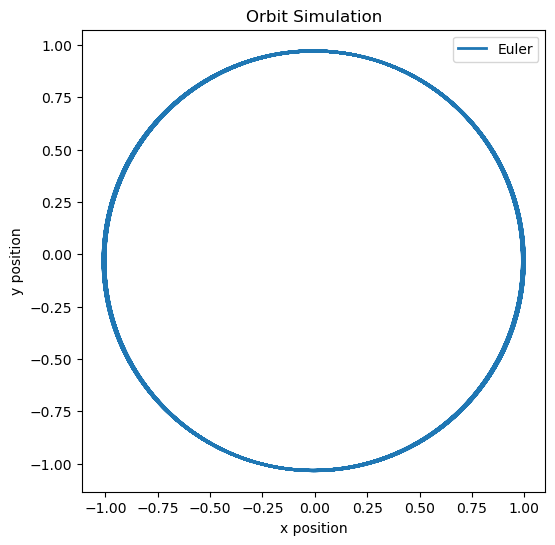

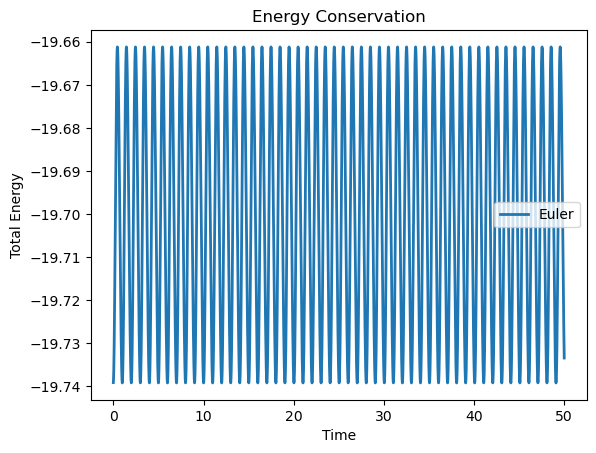

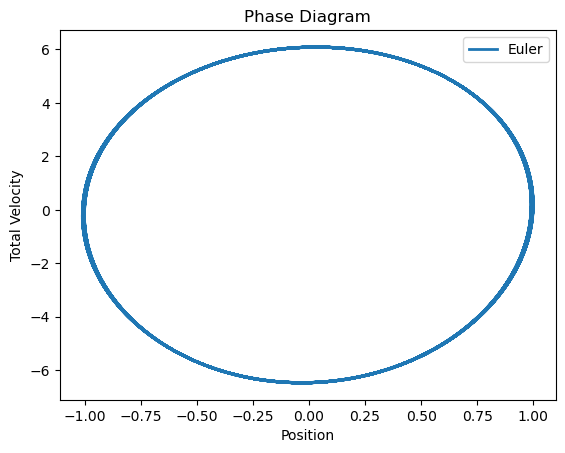


Simulating with RK2


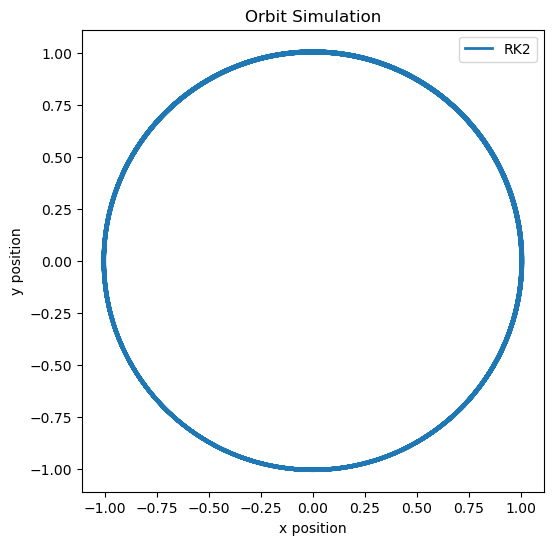

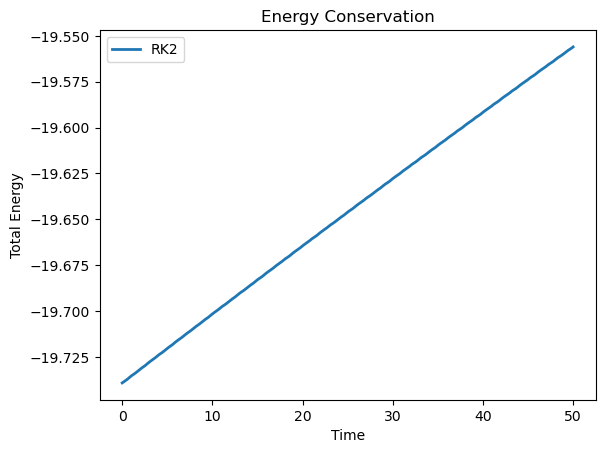

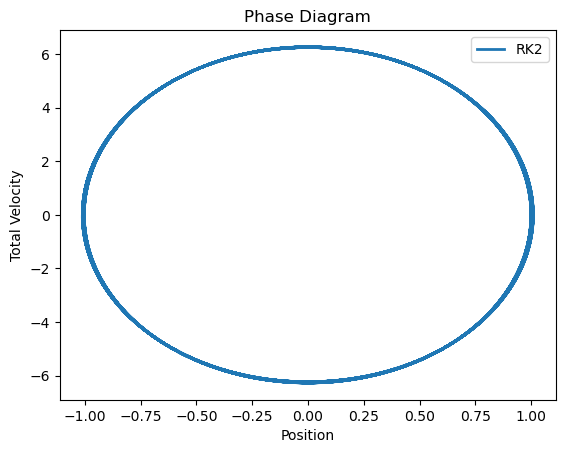


Simulating with RK4


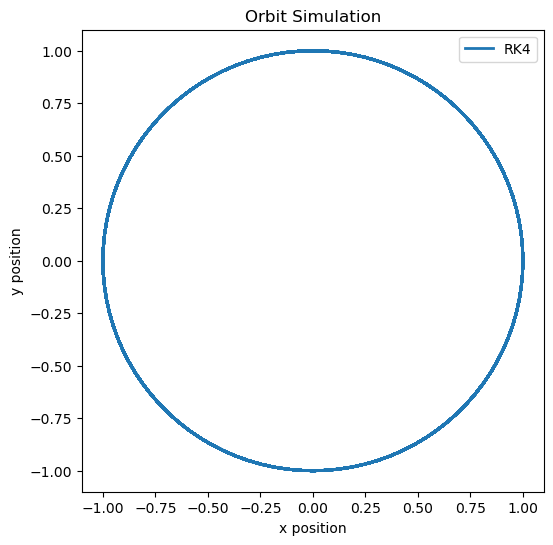

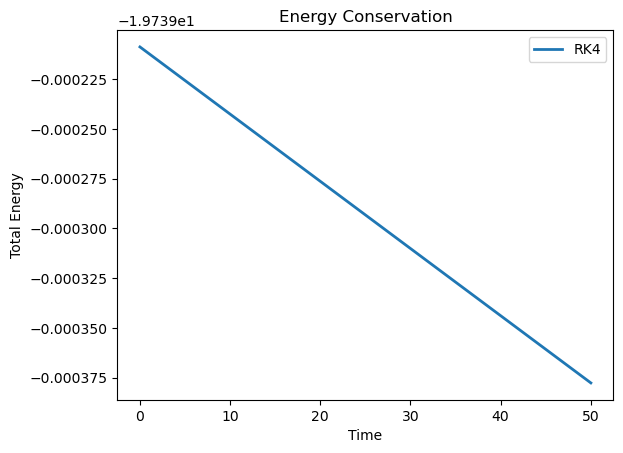

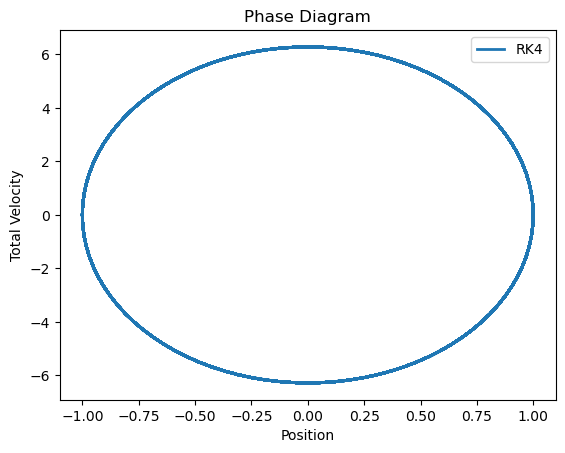

In [8]:
from matplotlib import pyplot as plt
import math

GM = 4 * math.pi ** 2
r = 1  # Radius of the orbit
v0 = math.sqrt(GM/r)   # Circular orbit condition

x0 = r  # Initial position
y0 = 0.0  # Start from the x-axis
v0x = 0.0  # Initial velocity in x-direction
v0y = v0  # Initial velocity entirely in the y-direction
dt = 0.01  # Time step
tmax = 50
nsteps = int(tmax / dt)

#one way to write the equations of motion
def central_force(pos):
    r = np.linalg.norm(pos)
    return -GM * pos / r ** 3

# Runs through methods and prepares for data collection
methods = {'Euler': 'euler', 'RK2': 'rk2', 'RK4': 'rk4'}
for method_name, method in methods.items():
    print(f'\nSimulating with {method_name}')
    x, y, vx, vy, energy = (
        np.zeros(nsteps),
        np.zeros(nsteps),
        np.zeros(nsteps),
        np.zeros(nsteps),
        np.zeros(nsteps),
    )

# Your Code here
    x[0], y[0], vx[0], vy[0] = x0, y0, v0x, v0y
    energy[0] = 0.5*(v0y**2 + v0x**2) - GM/r

    p = Particle2D(1.0, x0, y0, v0x, v0y)

    for i in range(nsteps):
        force = central_force(p.position)
        if method == 'euler':
            p.euler(force,dt)
        else: 
            getattr(p, method)(lambda pos, vel: central_force(pos), dt)
        x[i], y[i] = p.x, p.y
        vx[i], vy[i] = p.vx, p.vy
        r = math.sqrt(p.x**2 + p.y**2)
        energy[i] = 0.5*(p.vx**2 + p.vy**2) - GM/r
        #angular_momentum[i] = p.x*p.vy - p.y*p.vx
        
    t = np.linspace(0.0, tmax, nsteps)
    
    plt.figure(figsize=(6, 6))
    plt.plot(x, y, lw=2, label=method_name)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel('x position')
    plt.ylabel('y position')
    plt.title('Orbit Simulation')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(t, energy, lw=2, label=method_name)
    plt.xlabel('Time')
    plt.ylabel('Total Energy')
    plt.title('Energy Conservation')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(x,vx, lw=2, label=method_name)
    plt.xlabel('Position')
    plt.ylabel('Total Velocity')
    plt.title('Phase Diagram')
    plt.legend()
    plt.show()



## Simulation of an Elliptical Orbit

Now let's inject eccentricity into the mix! Again use the initial code here to model elliptical orbits. Modify the function `central_force` to your liking (this is just another form of the same function from above). Capture your position and velocity values so that you can plot the orbit, total energy and a phase diagram just as before. Consider the questions:

1. Increase the eccentricity. At what point does Euler break down, and how can you tell both visually and from the energy plot?
1. Run RK4 for many orbital periods. Is energy truly conserved in the long run?
1. Try `solve_ivp` with adaptive stepping. How does its long-term behavior compare to fixed-step RK4, and does "more accurate per step" mean "better" here?

In [ ]:
a = 1 # Semi-major axis of the ellipse
e = 0.016  # Eccentricity of the orbit
x0 = a * (1 - e)  # Initial position (perihelion)
y0 = 0.0
v0x = 0.0
v0y =  np.sqrt(GM*(1 + e)/x0) # Adjusted velocity for elliptical orbit
dt = 0.01  # Time step
tmax = 6
nsteps = int(tmax / dt)

# another way to define the equations of motion
def central_force(t, state):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    ax = -GM * x / r**3
    ay = -GM * y / r**3
    return [vx, vy, ax, ay]

methods = {'Euler': 'euler', 'RK2': 'rk2', 'RK4': 'rk4'}

for method_name, method in methods.items():
    print(f'\nSimulating with {method_name}')
    x, y, vx, vy, energy = (
        np.zeros(nsteps),
        np.zeros(nsteps),
        np.zeros(nsteps),
        np.zeros(nsteps),
        np.zeros(nsteps),
    )


#Your Code here

plt.figure(figsize=(6, 6))

plt.plot(x, y, lw=2, label=method_name)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('Elliptical Orbit Simulation')
plt.legend()

plt.figure()

plt.plot(np.linspace(0, tmax, nsteps), energy, lw=2, label=method_name)
plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.title('Energy Conservation')
plt.legend()
plt.show()

plt.figure()

plt.plot(position, totalv, lw=2, label=method_name)
plt.xlabel('Position')
plt.ylabel('total velocity')
plt.title('Phase Diagram')
plt.legend()
plt.gca().set_aspect('equal')
plt.show()



# A mini solar system

The presence of other planets implies that the total force on a planet is no longer a central force. Furthermore, since the orbits are not exactly on the same plane, the analysis must be extended to 3D. However, for simplicity, we are going to again assume that the angular momentum of the planetary system is restricted to a single plane, with twoo planets in orbit around the sun.

The equations of motion of the two planets of mass $m_1$ and $m_2$ can be written in vector form as
$$\begin{aligned}
&& m_1\frac{d^2 {\mathbf r}_1}{dt^2}=-\frac{Gm_1M}{r_1^3}{\mathbf r}_1+\frac{Gm_1m_2}{r_{21}^3}{\mathbf r}_{21}, \\
&& m_2\frac{d^2 {\mathbf r}_2}{dt^2}=-\frac{Gm_2M}{r_2^3}{\mathbf 
r}_2+\frac{Gm_1m_2}{r_{21}^3}{\mathbf r}_{21},\end{aligned}$$ 
where ${\mathbf r}_1$ and ${\mathbf r}_2$ are directed form the sun to the planets, and ${\mathbf r}_{21}={\mathbf r}_2-{\mathbf r}_1$ is the vector from planet 1 to planet 2. This is a problem with no analytical solution, but its numerical solution can be obtained extending our previous analysis for the two-body problem.

## A three body problem 

Let us consider astronomical units, and values for the masses $m_1/M=0.01$ and $m_2/M=0.1$. Consider initial positions $r_1$ and $r_2$ and velocities ${\mathbf v}_{1,2}=(0,\sqrt{GM/r_{1,2}})$, for circular orbits.

We want to write a program to calculate the trajectories of the two planets and to plot those trajectories. We would like to answer the questions 
- What would the shape and the periods of the orbits be if the don’t interact?
- What is the qualitative effect of the interaction.
- Why is one planet affected more by the interaction that the other?
- Are the angular momentum and energy of planet 1 conserved? Is the total angular momentum and energy of the two planets conserved?

### First with no interaction term


In [ ]:
import numpy as np
import math

# Define constants
GM = 4*np.pi**2  # Gravitational parameter
NPLANETS = 2

dt = 0.001  # Time step
tmax = 1
nsteps = int(tmax / dt)
r1 = 1
r2 = 4.0/3.0
m1 = 0.1
m2 = 0.02

# Initialize planets
planets = [
    Particle2D(mass=0.1, x=r1, y=0.0, vx=0.0, vy=math.sqrt(GM / r1)),
    Particle2D(mass=0.01, x=r2, y=0.0, vx=0.0, vy=math.sqrt(GM / r2))
]

# Storage arrays
x = np.zeros((nsteps, NPLANETS))
y = np.zeros((nsteps, NPLANETS))
vx = np.zeros((nsteps, NPLANETS))
vy = np.zeros((nsteps, NPLANETS))
energy = np.zeros((nsteps, NPLANETS))

# Initial conditions
for i in range(NPLANETS):
    x[0, i] = planets[i].x
    y[0, i] = planets[i].y
    vx[0, i] = planets[i].vx
    vy[0, i] = planets[i].vy
    energy[0, i] = 0.5 * (planets[i].vx ** 2 + planets[i].vy ** 2) - GM / math.sqrt(planets[i].x ** 2 + planets[i].y ** 2)

# Time evolution loop
for i in range(1, nsteps):
    for n in range(NPLANETS):
        r = math.sqrt(planets[n].x ** 2 + planets[n].y ** 2)
        r3 = r ** 3
        fx = -GM * planets[n].mass * planets[n].x / r3
        fy = -GM * planets[n].mass * planets[n].y / r3
        
        planets[n].euler(np.array([fx, fy]), dt)  # Using Euler method; can replace with rk2 or rk4
        
        x[i, n] = planets[n].x
        y[i, n] = planets[n].y
        vx[i, n] = planets[n].vx
        vy[i, n] = planets[n].vy
        energy[i, n] = 0.5 * (planets[n].vx ** 2 + planets[n].vy ** 2) - GM / r

# Time array
t = np.linspace(0., tmax, nsteps)


In [ ]:
plt.plot(x[:,0], y[:,0], color='blue', ls='-', lw=3)
plt.plot(x[:,1], y[:,1], color='red', ls='-', lw=3)
plt.gca().set_aspect('equal')
plt.xlabel('position x')
plt.ylabel('position y');

In [ ]:
plt.plot(t, energy[:,0], color='blue', ls='-', lw=3, label='Planet 1')
plt.plot(t, energy[:,1], color='red', ls='-', lw=3, label = 'Planet 2')
plt.plot(t, energy[:,0]+energy[:,1], color='green', ls='-', lw=3, label = 'Both planets')

plt.xlabel('time')
plt.ylabel('Energy');

In this particular case, since both planets do not interact, the individual energies are conserved.

## The Interaction between the Two Planets

Modify the previous code to introduce the gravitational interaction between planets, and repeat the calculations. Consider masses $m_1=0.1$ and $m_2=0.01$, and the initial positions ${\bf r}_1$ and ${\bf r}_2$, with velocities corresponding to circular orbits. Plot the orbits for some number of periods, and the individual and total energies.

In [ ]:
import numpy as np
import math

# Define constants
GM = 4*np.pi**2  # Gravitational parameter
NPLANETS = 2
dt = 0.01  # Time step
tmax = 5
nsteps = int(tmax / dt)
r1 = 1.8 
r2 = 1.2
m1 = 0.1
m2 = 0.01

# Initialize planets as Particle2D instances
planets = [
    Particle2D(mass=m1, x=r1, y=0.0, vx=0.0, vy=math.sqrt(GM / r1)),
    Particle2D(mass=m2, x=r2, y=0.0, vx=0.0, vy=math.sqrt(GM / r2))
]

# Storage arrays
x = np.zeros((nsteps, NPLANETS))
y = np.zeros((nsteps, NPLANETS))
vx = np.zeros((nsteps, NPLANETS))
vy = np.zeros((nsteps, NPLANETS))
energy = np.zeros((nsteps, NPLANETS))
angmom = np.zeros((nsteps, NPLANETS))

# Initial conditions
for i in range(NPLANETS):
    x[0, i] = planets[i].x
    y[0, i] = planets[i].y
    vx[0, i] = planets[i].vx
    vy[0, i] = planets[i].vy
    energy[0, i] = 0.5 * (planets[i].vx ** 2 + planets[i].vy ** 2) - GM / math.sqrt(planets[i].x ** 2 + planets[i].y ** 2)
    angmom[0,i] = planets[i].x*planets[i].vy - planets[i].y*planets[i].vx

# Time evolution loop
for i in range(1, nsteps):
    for n in range(NPLANETS):
        # Force from central sun
        r = math.sqrt(planets[n].x ** 2 + planets[n].y ** 2)
        r3 = r ** 3
        fx = -GM * planets[n].mass * planets[n].x / r3
        fy = -GM * planets[n].mass * planets[n].y / r3

        # Interaction with the other planet
        for j in range(NPLANETS):
            if j != n:
                dx = planets[j].x - planets[n].x
                dy = planets[j].y - planets[n].y
                r_ij = math.sqrt(dx ** 2 + dy ** 2)
                r_ij3 = r_ij ** 3 if r_ij > 1e-6 else 1e-6  # Prevent division by zero
                f_ij = (planets[n].mass * planets[j].mass) / r_ij3
                fx += f_ij * dx
                fy += f_ij * dy
        
        # Update using Euler method
        planets[n].euler(np.array([fx, fy]), dt)  # Convert force to numpy array

        # Store results
        x[i, n] = planets[n].x
        y[i, n] = planets[n].y
        vx[i, n] = planets[n].vx
        vy[i, n] = planets[n].vy
        energy[i, n] = 0.5 * (planets[n].vx ** 2 + planets[n].vy ** 2) - GM / r
        angmom[i,n] = planets[n].x*planets[n].vy - planets[n].y*planets[n].vx

# Time array
t = np.linspace(0., tmax, nsteps)

In [ ]:
plt.plot(x[:,0], y[:,0], color='blue', ls='-', lw=3)
plt.plot(x[:,1], y[:,1], color='red', ls='-', lw=3)
plt.gca().set_aspect('equal')
plt.xlabel('position x')
plt.ylabel('position y');

In [ ]:
plt.plot(t, energy[:,0], color='blue', ls='-', lw=3, label='Planet 1')
plt.plot(t, energy[:,1], color='red', ls='-', lw=3, label = 'Planet 2')
plt.plot(t, energy[:,0]+energy[:,1], color='green', ls='-', lw=3, label = 'Both planets')

plt.xlabel('time')
plt.ylabel('Energy');

In [ ]:
plt.plot(t, angmom[:,0], color='blue', ls='-', lw=3, label='Planet 1')
plt.plot(t, angmom[:,1], color='red', ls='-', lw=3, label = 'Planet 2')
plt.plot(t, angmom[:,0]+angmom[:,1], color='green', ls='-', lw=3, label = 'Both planets')

plt.xlabel('time')
plt.ylabel('Angular Momentum');
plt.legend()

# Appendix: Using `solve_ivp` for the orbit solution
We get similar results using the built in function in `scipy`.

In [ ]:
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

GM = 4 * math.pi ** 2
r = 1  # Radius of the orbit
v0 = math.sqrt(GM / r)  # Circular orbit condition

x0 = r  # Initial position
y0 = 0.0  # Start from the x-axis
v0x = 0.0  # Initial velocity in x-direction
v0y = v0  # Initial velocity entirely in the y-direction
dt = 0.01  # Time step
tmax = 4.0
nsteps = int(tmax / dt)

def central_force(t, state):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    ax = -GM * x / r**3
    ay = -GM * y / r**3
    return [vx, vy, ax, ay]

sol = solve_ivp(central_force, [0, tmax], [x0, y0, v0x, v0y], t_eval=np.linspace(0, tmax, nsteps), method='DOP853')

x, y, vx, vy = sol.y
energy = 0.5 * (vx**2 + vy**2) - GM / np.sqrt(x**2 + y**2)
angular_momentum = x * vy - y * vx

t = sol.t

plt.figure(figsize=(6, 6))
plt.plot(x, y, lw=2, label='solve_ivp RK45')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('Orbit Simulation using solve_ivp')
plt.legend()
plt.show()

plt.figure()
plt.plot(t, energy, lw=2, label='Energy')
plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.title('Energy Conservation')
plt.legend()
plt.show()

plt.figure()
plt.plot(t, angular_momentum, lw=2, label='Angular Momentum')
plt.xlabel('Time')
plt.ylabel('Angular Momentum')
plt.title('Angular Momentum Conservation')
plt.legend()
plt.show()